In [ ]:
# Importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectKBest   # para seleccionar atributos de forma univariada (filtros)
from sklearn.feature_selection import chi2   # estadististica para evaluar la importancia de atributos en relacion al target
from sklearn.feature_selection import RFE    # metodo recursive featute elimination
from sklearn.decomposition import PCA        # para transformacion PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # para modelos discriminantes lineales
from sklearn.naive_bayes import GaussianNB   # para modelos Naive Bayes
from sklearn.linear_model import LogisticRegression # para usar modelos de regresion logistica
from sklearn.tree import DecisionTreeClassifier     # para usar modelos de tipo arboles de decision
from sklearn.neighbors import KNeighborsClassifier  # para modelos  Knn
from sklearn.svm import SVC   # para modelos SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import accuracy_score, balanced_accuracy_score   # para manejar metricas de desempeño
from sklearn.metrics import classification_report  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import confusion_matrix  # para manejar matrices de confusion
from sklearn.metrics import jaccard_score  # indice jacard

from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
import tensorflow
from tensorflow import keras
# Carga capas de Keras para crear redes neuronales MLP
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [ ]:
# Version de tensorflow y keras
print(tensorflow.__version__)

2.15.0


In [ ]:
def make_boxplot(dataframe):
    # Número de columnas numéricas
    num_columns = dataframe.select_dtypes(include=['float64', 'int64']).shape[1]

    # Configura el tamaño de la figura para acomodar todos los subplots
    plt.figure(figsize=(5 * num_columns, 4))

    # Itera sobre las columnas numéricas para crear un boxplot para cada una
    for i, column in enumerate(dataframe.select_dtypes(include=['float64', 'int64']).columns):
        plt.subplot(1, num_columns, i + 1)  # (1, num_columns, index)
        dataframe[column].plot(kind='box', grid=True)
        plt.title(column)

    plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def encode_categorical_column(dataframe, columns=None, encoding_type='LabelEncoder'):
    """
    Encodes a categorical column in the dataframe to numeric format using the specified encoding type.
    """
    if columns is None:
        columns = dataframe.select_dtypes(include=['object', 'category']).columns

    if encoding_type not in ['LabelEncoder', 'OneHotEncoder']:
        raise ValueError("encoding_type must be 'LabelEncoder' or 'OneHotEncoder'")

    for column in columns:
        if encoding_type == 'LabelEncoder':
            # Use LabelEncoder for label encoding
            le = LabelEncoder()
            dataframe[column] = le.fit_transform(dataframe[column])
        elif encoding_type == 'OneHotEncoder':
            # Use OneHotEncoder from scikit-learn for one-hot encoding
            ohe = OneHotEncoder(sparse_output=False)
            encoded_features = ohe.fit_transform(dataframe[[column]])
            encoded_feature_names = ohe.get_feature_names_out(input_features=[column])
            dataframe = pd.concat([dataframe.drop(column, axis=1), pd.DataFrame(encoded_features, columns=encoded_feature_names, index=dataframe.index)], axis=1)

    return dataframe


### **Análisis exploratorio de datos**

In [ ]:
df = pd.read_csv('diabetes_data.csv',index_col=0)
df.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,,,,,,,,,,,,,,,,
40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.isnull().sum()

Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
# Convierta variables categoricas a numericas  (Polyuria, Polydipsia, sudden weight loss)
# tipos de conversión: LabelEncoder, OneHotEncoder

df=encode_categorical_column(df,['Gender'],'OneHotEncoder')

df=encode_categorical_column(df,['Polyuria'],'OneHotEncoder')

df=encode_categorical_column(df,['Polydipsia'],'OneHotEncoder')

df=encode_categorical_column(df,['sudden weight loss'],'OneHotEncoder')

df=encode_categorical_column(df,['weakness'],'OneHotEncoder')

df=encode_categorical_column(df,['Polyphagia'],'OneHotEncoder')

df=encode_categorical_column(df,['Genital thrush'],'OneHotEncoder')

df=encode_categorical_column(df,['visual blurring'],'OneHotEncoder')

df=encode_categorical_column(df,['Itching'],'OneHotEncoder')

df=encode_categorical_column(df,['Irritability'],'OneHotEncoder')

df=encode_categorical_column(df,['delayed healing'],'OneHotEncoder')

df=encode_categorical_column(df,['muscle stiffness'],'OneHotEncoder')

df=encode_categorical_column(df,['partial paresis'],'OneHotEncoder')

df=encode_categorical_column(df,['Alopecia'],'OneHotEncoder')

df=encode_categorical_column(df,['Obesity'],'OneHotEncoder')

df=encode_categorical_column(df,['class'],'OneHotEncoder')

df.head()

,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,...,muscle stiffness_No,muscle stiffness_Yes,partial paresis_No,partial paresis_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,class_Negative,class_Positive
Age,,,,,,,,,,,,,,,,,,,,,
40,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
58,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
41,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
def remove_no_columns(dataframe):
    """
    Removes columns from the dataframe that end with '_No'.
    """
    columns_to_remove = [col for col in dataframe.columns if col.endswith('_No')]
    dataframe.drop(columns=columns_to_remove, inplace=True)
    return dataframe

def rename_yes_columns(dataframe):
    """
    Renames columns in the dataframe that end with '_Yes' to remove the '_Yes' suffix.
    """
    new_columns = {col: col[:-4] for col in dataframe.columns if col.endswith('_Yes')}
    dataframe.rename(columns=new_columns, inplace=True)
    return dataframe

In [ ]:
df = remove_no_columns(df)
df = rename_yes_columns(df)
df.head()

,Gender_Female,Gender_Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,muscle stiffness,partial paresis,Alopecia,Obesity,class_Negative,class_Positive
Age,,,,,,,,,,,,,,,,,,
40,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
58,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
41,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
45,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
60,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
df.nunique()

Gender_Female         2
Gender_Male           2
Polyuria              2
Polydipsia            2
sudden weight loss    2
weakness              2
Polyphagia            2
Genital thrush        2
visual blurring       2
Itching               2
Irritability          2
delayed healing       2
muscle stiffness      2
partial paresis       2
Alopecia              2
Obesity               2
class_Negative        2
class_Positive        2
dtype: int64

In [ ]:
df = df.drop(['class_Negative'], axis = 1)
df.head()

,Gender_Female,Gender_Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,muscle stiffness,partial paresis,Alopecia,Obesity,class_Positive
Age,,,,,,,,,,,,,,,,,
40,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
58,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
41,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
45,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
60,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
def class_count_table(dataframe):

    count_data = {}

    # Iterate over each column in the DataFrame
    for column in dataframe.columns:
        # Get value counts for the current column
        class_counts = dataframe[column].value_counts()

        # Iterate over each class in the value counts
        for cls, count in class_counts.items():
            # Update count_data with counts for each class and column
            count_data.setdefault(column, {})[cls] = count

    # Create DataFrame from count_data and fill NaN with 0
    count_df = pd.DataFrame(count_data).fillna(0).astype(int)

    return count_df

def class_percentage_table(dataframe):

    percentage_data = {}

    # Iterate over each column in the DataFrame
    for column in dataframe.columns:
        # Get value counts for the current column and calculate percentages
        class_percentages = dataframe[column].value_counts(normalize=True) * 100

        # Iterate over each class in the percentages
        for cls, percentage in class_percentages.items():
            # Update percentage_data with formatted percentages (one decimal)
            percentage_data.setdefault(column, {})[cls] = round(percentage, 1)

    # Create DataFrame from percentage_data and fill NaN with 0
    percentage_df = pd.DataFrame(percentage_data).fillna(0)

    return percentage_df


In [ ]:
class_count_table(df)

,Gender_Female,Gender_Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,muscle stiffness,partial paresis,Alopecia,Obesity,class_Positive
0.0,328,192,262,287,303,215,283,404,287,267,394,281,325,296,341,432,200
1.0,192,328,258,233,217,305,237,116,233,253,126,239,195,224,179,88,320


In [ ]:
class_percentage_table(df)

,Gender_Female,Gender_Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,muscle stiffness,partial paresis,Alopecia,Obesity,class_Positive
0.0,63.1,36.9,50.4,55.2,58.3,41.3,54.4,77.7,55.2,51.3,75.8,54.0,62.5,56.9,65.6,83.1,38.5
1.0,36.9,63.1,49.6,44.8,41.7,58.7,45.6,22.3,44.8,48.7,24.2,46.0,37.5,43.1,34.4,16.9,61.5


In [ ]:
# Añadir la columna 'datos_importantes' como una nueva columna en la posición 1
df.insert(0, 'Edad', df.index)

# Reiniciar el índice para generar uno nuevo
df.reset_index(drop=True, inplace=True)

In [ ]:
df.isnull().sum()

Edad                  0
Gender_Female         0
Gender_Male           0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
muscle stiffness      0
partial paresis       0
Alopecia              0
Obesity               0
class_Positive        0
dtype: int64

In [ ]:
df['Edad'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Edad, dtype: float64

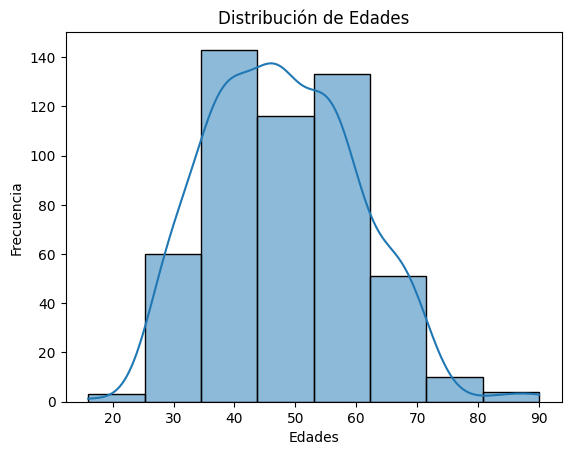

In [ ]:
sns.histplot(data=df, x='Edad', bins=8, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

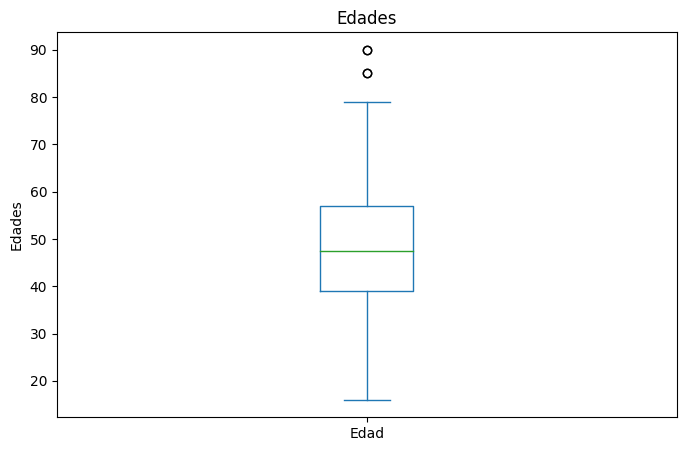

In [ ]:
plt.figure(figsize=[8, 5])
df['Edad'].plot(kind='box')
plt.title('Edades')
plt.ylabel('Edades')
plt.show()

In [ ]:
df.head()

,Edad,Gender_Female,Gender_Male,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,muscle stiffness,partial paresis,Alopecia,Obesity,class_Positive
0,40,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,58,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2,41,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,45,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,60,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df.dtypes

Edad                    int64
Gender_Female         float64
Gender_Male           float64
Polyuria              float64
Polydipsia            float64
sudden weight loss    float64
weakness              float64
Polyphagia            float64
Genital thrush        float64
visual blurring       float64
Itching               float64
Irritability          float64
delayed healing       float64
muscle stiffness      float64
partial paresis       float64
Alopecia              float64
Obesity               float64
class_Positive        float64
dtype: object

### **Separación en train y test**

In [ ]:
#obtenga la data
y = df['class_Positive']
x =df.drop(['class_Positive'],axis=1).values

# realiza el train-test split
vadid_fraction = 0.20    # proporcion de muestras para validacion
seed = 7   # semilla para el generador aleatorio (para reproductibilidad)
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=vadid_fraction, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 416 ejemplos. Validation: 104 ejemplos


### **Evalua diferentes algoritmos de ML en crossvalidacion**

In [ ]:
# Definimos el pool de pipleines de ML
# (MinMaxScaler + algoritmo de ML) a evaluar
pipelines = []
pipelines.append(('LogReg', make_pipeline(MinMaxScaler(),
                LogisticRegression(solver='liblinear'))))
pipelines.append(('5NN', make_pipeline(MinMaxScaler(),
                KNeighborsClassifier(n_neighbors=5))))
pipelines.append(('10NN', make_pipeline(MinMaxScaler(),
                KNeighborsClassifier(n_neighbors=10))))
pipelines.append(('CART', make_pipeline(MinMaxScaler(),
                DecisionTreeClassifier(max_depth=None))))
pipelines.append(('SVM', make_pipeline(MinMaxScaler(), SVC())))
pipelines.append(('RF', make_pipeline(MinMaxScaler(),
                RandomForestClassifier())))
pipelines.append(('NB', make_pipeline(MinMaxScaler(), GaussianNB())))


In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
# Definir los puntajes personalizados
# Definir los puntajes personalizados
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Resultados
results = {key: [] for key in scoring.keys()}
names = []

# Genera el particionamiento de 10 folds que serán usados en cada evaluación
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)  # especifica el particionador de datos a 10-folds CV

# Evalua cada pipeline en cross-validation
for pipelinename, pipeline in pipelines:
    print(f"Evaluating {pipelinename}")
    cv_results = cross_validate(pipeline, x_train, y_train, cv=kfold, scoring=scoring)
    for score_name in scoring.keys():
        results[score_name].append((pipelinename, cv_results['test_' + score_name]))
        print(f"{score_name} for {pipelinename}: {cv_results['test_' + score_name].mean()} ({cv_results['test_' + score_name].std()})")

# Imprime los resultados finales
for score_name, score_results in results.items():
    print(f"Results for {score_name}:")
    for pipelinename, cv_results in score_results:
        print(f"{pipelinename}: {cv_results.mean()} ({cv_results.std()})")

Evaluating LogReg
accuracy for LogReg: 0.9349593495934961 (0.03602711823505906)
precision for LogReg: 0.9433328206114723 (0.029564843654341092)
recall for LogReg: 0.9349593495934961 (0.03602711823505906)
f1_score for LogReg: 0.9354226296018358 (0.035996978332564725)
Evaluating 5NN
accuracy for 5NN: 0.9179442508710801 (0.046664066506008246)
precision for 5NN: 0.9326788030066562 (0.03279321882927873)
recall for 5NN: 0.9179442508710801 (0.046664066506008246)
f1_score for 5NN: 0.9195366687479204 (0.04507099834012241)
Evaluating 10NN
accuracy for 10NN: 0.8987224157955866 (0.061385272813203565)
precision for 10NN: 0.9242960125500762 (0.036416881295689214)
recall for 10NN: 0.8987224157955866 (0.061385272813203565)
f1_score for 10NN: 0.9013863860342999 (0.058723371065057095)
Evaluating CART
accuracy for CART: 0.9567944250871079 (0.03843489694308123)
precision for CART: 0.9615868548795378 (0.0339782856016792)
recall for CART: 0.9567944250871079 (0.03843489694308123)
f1_score for CART: 0.9573200

In [ ]:
# Evaluamos cada pipeline de ML en estrategia de 10-fold-CV
results = []
names = []

# genera el particionamiento de 10 folds que seran usados en cada evaluacion
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)  # especifica el particionador de datos a 10-folds CV

#  evalua cada pipeline en crosvalidacion
for pipelinename, pipeline in pipelines:
    cv_results = cross_val_score(pipeline, x_train, y_train, cv=kfold, scoring='balanced_accuracy')
    results.append(cv_results)
    names.append(pipelinename)
    print("{}: {} ({})".format(pipelinename, cv_results.mean(), cv_results.std()))

LogReg: 0.9401576487399916 (0.035097519261665676)
5NN: 0.9303259928074462 (0.03534658196836894)
10NN: 0.9179713232281144 (0.04212781408035168)
CART: 0.9706404227414414 (0.02841589927984317)
SVM: 0.9718727805867026 (0.027889462535007577)
RF: 0.9773203169213357 (0.026532784236231774)
NB: 0.8770950013012833 (0.0678002808035862)


In [ ]:
# Definir los modelos individuales dentro de pipelines
model1 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=None))
model2 = make_pipeline(MinMaxScaler(), SVC(probability=True))  # Necesitamos probabilities para el meta-modelo
model3 = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# Crear el modelo híbrido utilizando StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('CART', model1),
        ('SVM', model2),
        ('RF', model3)
    ],
    final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # El meta-modelo
)

# Definir los puntajes personalizados
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Evaluar el modelo híbrido utilizando validación cruzada
cv_results = cross_validate(stacked_model, x_train, y_train, cv=5, scoring=scoring)

# Calcular las medias y desviaciones estándar para cada métrica
accuracy_mean = cv_results['test_accuracy'].mean()
accuracy_std = cv_results['test_accuracy'].std()
recall_mean = cv_results['test_recall'].mean()
recall_std = cv_results['test_recall'].std()
precision_mean = cv_results['test_precision'].mean()
precision_std = cv_results['test_precision'].std()
f1_mean = cv_results['test_f1_score'].mean()
f1_std = cv_results['test_f1_score'].std()

# Imprimir los resultados
print(f'Accuracy del modelo híbrido (validación cruzada): {accuracy_mean:.4f} ({accuracy_std:.4f})')
print(f'Recall del modelo híbrido (validación cruzada): {recall_mean:.4f} ({recall_std:.4f})')
print(f'Precision del modelo híbrido (validación cruzada): {precision_mean:.4f} ({precision_std:.4f})')
print(f'F1 Score del modelo híbrido (validación cruzada): {f1_mean:.4f} ({f1_std:.4f})')

Accuracy del modelo híbrido (validación cruzada): 0.9808 (0.0059)
Recall del modelo híbrido (validación cruzada): 0.9808 (0.0059)
Precision del modelo híbrido (validación cruzada): 0.9814 (0.0057)
F1 Score del modelo híbrido (validación cruzada): 0.9808 (0.0059)


In [ ]:
# Definir los modelos individuales dentro de pipelines
model1 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=None))
model2 = make_pipeline(MinMaxScaler(), SVC(probability=True))  # Necesitamos probabilities para el meta-modelo
model3 = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# Crear el modelo híbrido utilizando StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('CART', model1),
        ('SVM', model2),
        ('RF', model3)
    ],
    final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')  # El meta-modelo
)

# Evaluar el modelo híbrido utilizando validación cruzada
cv_scores = cross_val_score(stacked_model, x_train, y_train, cv=5)
print(f'Accuracy del modelo híbrido (validación cruzada): {cv_scores.mean():.4f} ({cv_scores.std():.4f})')

Accuracy del modelo híbrido (validación cruzada): 0.9736 (0.0089)


In [ ]:
# Definir los modelos individuales dentro de pipelines
model1 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=None))
model2 = make_pipeline(MinMaxScaler(), SVC(probability=True))  # Necesitamos probabilities para el meta-modelo
model3 = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# Crear el modelo híbrido utilizando StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('CART', model1),
        ('SVM', model2),
        ('RF', model3)
    ],
    final_estimator=GradientBoostingClassifier()  # El meta-modelo
)

# Definir los puntajes personalizados
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Evaluar el modelo híbrido utilizando validación cruzada
cv_results = cross_validate(stacked_model, x_train, y_train, cv=5, scoring=scoring)

# Calcular las medias y desviaciones estándar para cada métrica
accuracy_mean = cv_results['test_accuracy'].mean()
accuracy_std = cv_results['test_accuracy'].std()
recall_mean = cv_results['test_recall'].mean()
recall_std = cv_results['test_recall'].std()
precision_mean = cv_results['test_precision'].mean()
precision_std = cv_results['test_precision'].std()
f1_mean = cv_results['test_f1_score'].mean()
f1_std = cv_results['test_f1_score'].std()

# Imprimir los resultados
print(f'Accuracy del modelo híbrido (validación cruzada): {accuracy_mean:.4f} ({accuracy_std:.4f})')
print(f'Recall del modelo híbrido (validación cruzada): {recall_mean:.4f} ({recall_std:.4f})')
print(f'Precision del modelo híbrido (validación cruzada): {precision_mean:.4f} ({precision_std:.4f})')
print(f'F1 Score del modelo híbrido (validación cruzada): {f1_mean:.4f} ({f1_std:.4f})')

Accuracy del modelo híbrido (validación cruzada): 0.9712 (0.0144)
Recall del modelo híbrido (validación cruzada): 0.9712 (0.0144)
Precision del modelo híbrido (validación cruzada): 0.9717 (0.0141)
F1 Score del modelo híbrido (validación cruzada): 0.9712 (0.0144)


In [ ]:
# Definir los modelos individuales dentro de pipelines
model1 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=None))
model2 = make_pipeline(MinMaxScaler(), SVC(probability=True))  # Necesitamos probabilities para el meta-modelo
model3 = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# Crear el modelo híbrido utilizando StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('CART', model1),
        ('SVM', model2),
        ('RF', model3)
    ],
    final_estimator=GradientBoostingClassifier()  # El meta-modelo
)

# Evaluar el modelo híbrido utilizando validación cruzada
cv_scores = cross_val_score(stacked_model, x_train, y_train, cv=5)
print(f'Accuracy del modelo híbrido (validación cruzada): {cv_scores.mean():.4f} ({cv_scores.std():.4f})')

Accuracy del modelo híbrido (validación cruzada): 0.9784 (0.0048)


In [ ]:
# Definir los modelos individuales dentro de pipelines
model1 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=None))
model2 = make_pipeline(MinMaxScaler(), SVC(probability=True))  # Necesitamos probabilities para el meta-modelo
model3 = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# Crear el modelo híbrido utilizando StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('CART', model1),
        ('SVM', model2),
        ('RF', model3)
    ],
    final_estimator=LogisticRegression()  # El meta-modelo
)

# Definir los puntajes personalizados
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score, average='weighted'),
    'precision': make_scorer(precision_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

# Evaluar el modelo híbrido utilizando validación cruzada
cv_results = cross_validate(stacked_model, x_train, y_train, cv=5, scoring=scoring)

# Calcular las medias y desviaciones estándar para cada métrica
accuracy_mean = cv_results['test_accuracy'].mean()
accuracy_std = cv_results['test_accuracy'].std()
recall_mean = cv_results['test_recall'].mean()
recall_std = cv_results['test_recall'].std()
precision_mean = cv_results['test_precision'].mean()
precision_std = cv_results['test_precision'].std()
f1_mean = cv_results['test_f1_score'].mean()
f1_std = cv_results['test_f1_score'].std()

# Imprimir los resultados
print(f'Accuracy del modelo híbrido (validación cruzada): {accuracy_mean:.4f} ({accuracy_std:.4f})')
print(f'Recall del modelo híbrido (validación cruzada): {recall_mean:.4f} ({recall_std:.4f})')
print(f'Precision del modelo híbrido (validación cruzada): {precision_mean:.4f} ({precision_std:.4f})')
print(f'F1 Score del modelo híbrido (validación cruzada): {f1_mean:.4f} ({f1_std:.4f})')

Accuracy del modelo híbrido (validación cruzada): 0.9736 (0.0089)
Recall del modelo híbrido (validación cruzada): 0.9736 (0.0089)
Precision del modelo híbrido (validación cruzada): 0.9748 (0.0084)
F1 Score del modelo híbrido (validación cruzada): 0.9736 (0.0088)


In [ ]:
# Definir los modelos individuales dentro de pipelines
model1 = make_pipeline(MinMaxScaler(), DecisionTreeClassifier(max_depth=None))
model2 = make_pipeline(MinMaxScaler(), SVC(probability=True))  # Necesitamos probabilities para el meta-modelo
model3 = make_pipeline(MinMaxScaler(), RandomForestClassifier())

# Crear el modelo híbrido utilizando StackingClassifier
stacked_model = StackingClassifier(
    estimators=[
        ('CART', model1),
        ('SVM', model2),
        ('RF', model3)
    ],
    final_estimator=LogisticRegression()  # El meta-modelo
)

# Evaluar el modelo híbrido utilizando validación cruzada
cv_scores = cross_val_score(stacked_model, x_train, y_train, cv=5)
print(f'Accuracy del modelo híbrido (validación cruzada): {cv_scores.mean():.4f} ({cv_scores.std():.4f})')

Accuracy del modelo híbrido (validación cruzada): 0.9784 (0.0048)


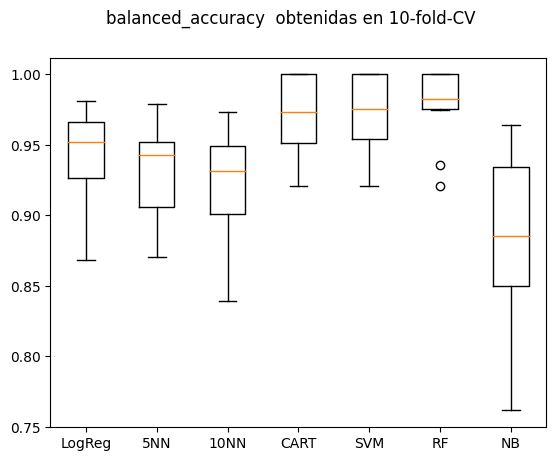

In [ ]:
# Muestra graficamente los resultados de balanced_accuracy  en crossvalidacion de los Algoritmos evaluados
fig = plt.figure()
fig.suptitle('balanced_accuracy  obtenidas en 10-fold-CV')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Reentrena el pipeline LR con todos los datos de entrenamiento y lo prueba en el conjunto de validación
model = make_pipeline(MinMaxScaler(), SVC())
model.fit(x_train, y_train)

# predice la c lase del conjunto de validacion
y_predicted = model.predict(x_valid)
print("Balanced Accuracy score:", balanced_accuracy_score(y_valid, y_predicted))

# muestra la matriz de confusion
# en la matriz de confusion, un elemento Cij es el numero de ejemplos predichos como clase j que son realmente de clase i
print("\nMatriz de Confusión:")
print(confusion_matrix(y_valid, y_predicted))

# muestra un reporte de la clasificacion en validacion
print("\nReporte de clasificacion en conjunto de validacion:\n")
print(classification_report(y_valid, y_predicted))

Balanced Accuracy score: 0.9481566820276498

Matriz de Confusión:
[[39  3]
 [ 2 60]]

Reporte de clasificacion en conjunto de validacion:

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        42
         1.0       0.95      0.97      0.96        62

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



### **Redes neuronales**

In [ ]:
y_1 = df['class_Positive']
x_1 =df.drop(['class_Positive'],axis=1).values

In [ ]:
y_1=np.array(y_1)
x_1=np.array(x_1)

In [ ]:
# realiza el train-test split
vadid_fraction = 0.20    # proporcion de muestras para validacion
seed = 7   # semilla para el generador aleatorio (para reproductibilidad)
x1_train, x1_valid, y1_train, y1_valid = train_test_split(x_1, y_1, test_size=vadid_fraction, random_state=seed)

print('Training: %d ejemplos. Validation: %d ejemplos' % (len(y_train), len(y_valid)))

Training: 416 ejemplos. Validation: 104 ejemplos


In [ ]:
y1_train = keras.utils.to_categorical(y1_train)
y1_valid = keras.utils.to_categorical(y1_valid)

In [ ]:
# convierte primero los pixels en numeros de punto flotante
x1_train_norm = x1_train.astype('float32')
x1_valid_norm = x1_valid.astype('float32')

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
x1_train_norm = scaler.fit_transform(x1_train_norm)
x1_valid_norm = scaler.fit_transform(x1_valid_norm)

x1_train_norm = x1_train_norm.reshape(-1,1, 17)
x1_valid_norm = x1_valid_norm.reshape(-1, 1, 17)

In [ ]:
x1_train_norm[0]

array([[0.3918919, 1.       , 0.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 0.       , 1.       , 1.       , 1.       ,
        1.       , 0.       , 1.       , 0.       , 0.       ]],
      dtype=float32)

In [ ]:
# Funcion para definir el modelo MLP de la figura de arriba
def define_modelo_MLP():
    modelo = Sequential()  # Sequential indica que el modelo sera una pila de capas conec tadas secuencialmente (MLP)
    modelo.add( Flatten(input_shape=[1,17]) ) # capa Flaten convierte la imagen de 28*28 a un vector 1D de 784 elementos
    modelo.add( Dense(100, activation="relu") ) # Define 1era capa oculta con 20 neuronas y funcion de activacion RELU
    modelo.add( Dense(50, activation="relu") ) # Define 1era capa oculta con 20 neuronas y funcion de activacion RELU
    modelo.add( Dense(30, activation="relu") ) # Define 2da capa oculta con 10 neuronas y funcion de activacion RELU
    modelo.add( Dense(2, activation="softmax") ) # Define capa de salida con 2 neuronas (salidas) con activacion softmax
    # compila el modelo
    #opt = SGD(lr=0.01, momentum=0.9)
    modelo.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'] )
    return modelo

In [ ]:
x1_train_norm[0]

array([[0.3918919, 1.       , 0.       , 1.       , 1.       , 1.       ,
        1.       , 1.       , 0.       , 1.       , 1.       , 1.       ,
        1.       , 0.       , 1.       , 0.       , 0.       ]],
      dtype=float32)

In [ ]:
modelo = define_modelo_MLP()  # llama a funcion que define el modelo
modelo.summary()

Model: "sequential_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_136 (Flatten)       (None, 17)                0         
                                                                 
 dense_541 (Dense)           (None, 100)               1800      
                                                                 
 dense_542 (Dense)           (None, 50)                5050      
                                                                 
 dense_543 (Dense)           (None, 30)                1530      
                                                                 
 dense_544 (Dense)           (None, 2)                 62        
                                                                 
Total params: 8442 (32.98 KB)
Trainable params: 8442 (32.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping
# evalua una arquitectura de modelo neuronal en k-fold cross-validation. Se pasa la funcion constructora del modelo
def evalua_modeloCV(model_buider, X, y, n_folds=5):
    accuracies, histories = list(), list()
    # prepara folds
    seed = 7
    kfold = KFold(n_splits=n_folds, random_state=seed, shuffle= True)

    # realiza la cross-validacion
    for train_ix, test_ix in kfold.split(X):   # por cada fold de test
        # define modelo MLP
        modelo = model_buider()
        # selecciona los sets de training y de test
        trainX, trainY, testX, testY = X[train_ix], y[train_ix], X[test_ix], y[test_ix]
        # entrena el modelo
        history = modelo.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # obtiene metricas de evaluacion en el fold de test del modelo entrenado
        _, acc = modelo.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))

        accuracies.append(acc)   # guarda la acuracia obtenida en el fold  de test
        histories.append(history)  # guarda hitórico de evolucion de scores entrenamiento  (loss y acuracias)
    return accuracies, histories

In [ ]:
cv_accuracies, cv_histories = evalua_modeloCV(define_modelo_MLP, x1_train_norm, y1_train, 5)

> 88.095
> 73.494
> 81.928
> 78.313
> 80.723


In [ ]:
# muestra un boxplot de las acuracias obtenidas en crosvalidacion
def show_boxplot_accuracy(accuracies):
    # muetra un resumen de las acuracies
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(accuracies)*100, np.std(accuracies)*100, len(accuracies)))
    # boxplot de las accuracias
    plt.boxplot(accuracies)
    plt.show()

# plotea curvas de diagnostico de aprendizaje
def plot_learning_curves(histories):
    for i in range(len(histories)):
        # plotea la curva de loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plotea curva de accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()

Accuracy: mean=80.511 std=4.767, n=5


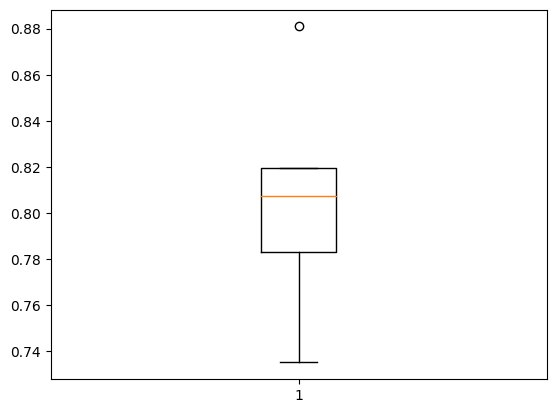

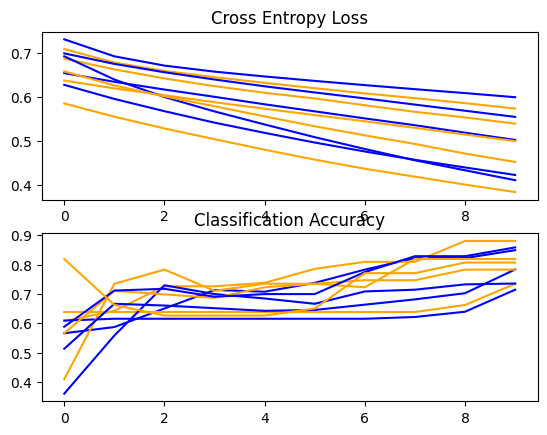

In [ ]:
show_boxplot_accuracy(cv_accuracies)   # muestra boxplot de resultados de acuracias de crossvalidacion
plot_learning_curves(cv_histories)     # muestra curvas de aprendizaje de cada modelo entrenado en crossvalidacion

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define modelo final
modelo_finalMLP = define_modelo_MLP()

# Entrena modelo final
modelo_finalMLP.fit(x1_train_norm, y1_train, epochs=10, batch_size=32, verbose=0)

# Evalúa modelo final en dataset de validación
_, acc = modelo_finalMLP.evaluate(x1_valid_norm, y1_valid, verbose=0)
print('Accuracy > %.3f' % (acc * 100.0))

# Predicciones en el dataset de validación
output_valid = modelo_finalMLP.predict(x1_valid_norm)

# Si se trata de un problema de clasificación, es necesario convertir las probabilidades de predicción en clases
y1_valid_pred = (output_valid > 0.5).astype("int32")

# Calcular las métricas
accuracy = accuracy_score(y1_valid, y1_valid_pred)
precision = precision_score(y1_valid, y1_valid_pred, average='weighted')
recall = recall_score(y1_valid, y1_valid_pred, average='weighted')
f1 = f1_score(y1_valid, y1_valid_pred, average='weighted')

# Imprimir los resultados
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy > 59.615
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.5962
Precision: 0.3554
Recall: 0.5962
F1 Score: 0.4453


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# define modelo final
modelo_finalMLP = define_modelo_MLP()

# entrena  modelo final
modelo_finalMLP.fit(x1_train_norm, y1_train, epochs=10, batch_size=32, verbose=0)

# evalua modelo final en  dataset de validacion
_, acc = modelo_finalMLP.evaluate(x1_valid_norm, y1_valid, verbose=0)
print('Accuracy > %.3f' % (acc * 100.0))

output_valid = modelo_finalMLP.predict(x1_valid_norm)

Accuracy > 78.846
4/4 [==============================] - 0s 3ms/step


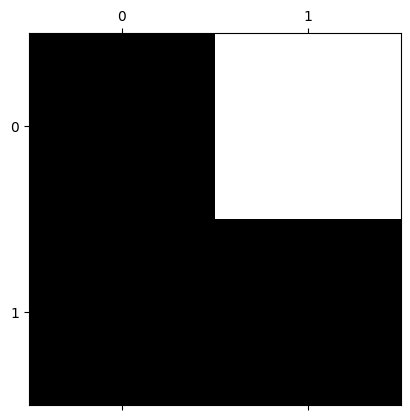

In [ ]:
# obtiene las categorias de las muestras de validacion (lo contrario de one hot)
digitos_reales = np.argmax(y1_valid, axis=1)
digitos_predichos = np.argmax(output_valid, axis=1)

# obtiene matriz de confusion
conf_mx = confusion_matrix(digitos_reales, digitos_predichos)

# normaliza las filas de la matriz de confusion
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

# coloca 0 en la diagonal para enfocarnos en los errores
np.fill_diagonal(norm_conf_mx, 0)

# plotea
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
conf_mx

array([[20, 22],
       [ 0, 62]])